In [1]:
import os
os.chdir('D:\Image_Classification')
os.getcwd()

'D:\\Image_Classification'

# Import Libraries

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import time

from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

from keras.applications.vgg16 import VGG16
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Fetching Data

In [3]:
train_data = 'train_data'
validtn_data = 'validtn_data'
test_data = 'test_data'

In [4]:
# ImageDataGenerator()-- Will help us in preprocessing the images
# flow_from_directory -- Loading our own dataset (train--> categories, test--> categories)

In [5]:
datagen = ImageDataGenerator()                                 # no-preprocessing
datagen_scal = ImageDataGenerator(rescale=1/255.0)             # scaled data
datagen_norm = ImageDataGenerator(rescale=1/255.0, samplewise_center=True,
                                  samplewise_std_normalization=True) # normalized data

In [6]:
train_nopre = datagen.flow_from_directory(train_data, target_size=(200,200), batch_size=8, class_mode='categorical')  #for default values of hyp-parms check:-
train_scal = datagen_scal.flow_from_directory(train_data, (200,200), batch_size=8)                        # https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
train_norm = datagen_norm.flow_from_directory(train_data, (200,200), batch_size=8)

Found 202 images belonging to 2 classes.
Found 202 images belonging to 2 classes.
Found 202 images belonging to 2 classes.


In [7]:
validtn_nopre = datagen.flow_from_directory(validtn_data, target_size=(200,200), batch_size=8, class_mode='categorical')
validtn_scal = datagen_scal.flow_from_directory(validtn_data, (200,200), batch_size=8)                   # as less images batch_size = 16, target_size is your choice - it can resize the image
validtn_norm = datagen_norm.flow_from_directory(validtn_data, (200,200), batch_size=8)

Found 60 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


# Model Building

In [8]:
def plot_accuracy(model):
    plt.subplot(121)
    acc = model.history['accuracy']
    val_acc = model.history['val_accuracy']
    epoch = range(len(acc))
    plt.plot(epoch, acc, label='Train')
    plt.plot(epoch, val_acc, label='Validation')
    plt.ylim([-0.1, 1.1])
    plt.legend(loc = 'upper left')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title("Training and Validation Accuracy", fontsize=15)

In [9]:
def plot_loss(model):
    plt.subplot(122)
    loss=model.history['loss']
    val_loss=model.history['val_loss']
    epoch = range(len(loss))
    plt.plot(epoch, loss, label='Loss')
    plt.plot(epoch, val_loss, label='Val_Loss')
    plt.ylim([-0.1,1.1])
    plt.legend(loc = 'upper right')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title("Training and Validation Loss", fontsize=15)

# **NO-PREPROCESSING**

## *Model-1*

In [10]:
model1=Sequential()
model1.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200,200,3)))
model1.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same' ))
model1.add(MaxPooling2D((2,2)))

model1.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same' ))
model1.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same' ))
model1.add(MaxPooling2D((2,2)))

model1.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same' ))
model1.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same' ))
model1.add(MaxPooling2D((2,2)))

model1.add(Flatten())
model1.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dense(2, activation='sigmoid'))

In [11]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 100, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 50, 50, 64)        0         
 g2D)                                                  

In [12]:
start = time.time()
history1=model1.fit(train_nopre, epochs=10, validation_data=validtn_nopre)
end = time.time()
print('\nTime taken for model training:',end-start,'Seconds')

Epoch 1/10


26/26 [==============================] - 12s 410ms/step - loss: 749.3513 - accuracy: 0.5000 - val_loss: 1.2138 - val_accuracy: 0.5000
Epoch 2/10
26/26 [==============================] - 13s 503ms/step - loss: 0.6516 - accuracy: 0.6634 - val_loss: 0.7759 - val_accuracy: 0.4833
Epoch 3/10
26/26 [==============================] - 10s 393ms/step - loss: 0.4327 - accuracy: 0.8267 - val_loss: 0.8750 - val_accuracy: 0.5500
Epoch 4/10
26/26 [==============================] - 10s 368ms/step - loss: 0.3052 - accuracy: 0.8713 - val_loss: 0.9392 - val_accuracy: 0.6000
Epoch 5/10
26/26 [==============================] - 9s 355ms/step - loss: 0.2252 - accuracy: 0.8960 - val_loss: 2.0565 - val_accuracy: 0.4667
Epoch 6/10
26/26 [==============================] - 10s 374ms/step - loss: 0.1693 - accuracy: 0.9356 - val_loss: 1.5693 - val_accuracy: 0.6167
Epoch 7/10
26/26 [==============================] - 11s 413ms/step - loss: 0.1740 - accuracy: 0.9703 - val_loss: 2.6035 - val_accuracy: 0.5

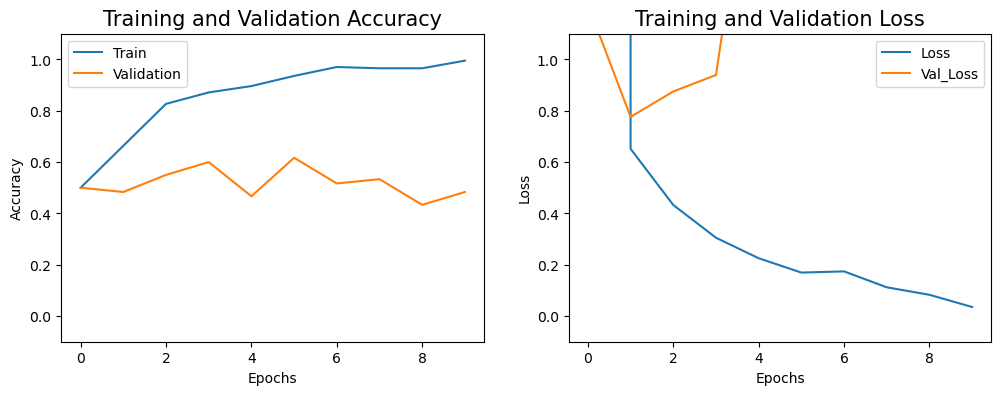

In [13]:
plt.figure(figsize=(12,4))
plot_accuracy(history1)
plot_loss(history1)

## *Model-2* --> Adding Dropout Layers

In [14]:
model2=Sequential()
model2.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200,200,3)))
model2.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same' ))
model2.add(MaxPooling2D((2,2)))
model2.add(Dropout(0.3))       ## 30% dropoff

model2.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same' ))
model2.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same' ))
model2.add(MaxPooling2D((2,2)))
model2.add(Dropout(0.3))       ## 30% dropoff

model2.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same' ))
model2.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same' ))
model2.add(MaxPooling2D((2,2)))
model2.add(Dropout(0.3))       ## 30% dropoff

model2.add(Flatten())
model2.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(2, activation='sigmoid'))

In [15]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 200, 200, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 100, 100, 32)      0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 100, 100, 32)      0         
                                                                 
 conv2d_8 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 100, 100, 64)      36928     
                                                      

In [16]:
start = time.time()
history2=model2.fit(train_nopre, epochs=10, validation_data=validtn_nopre)
end = time.time()
print('\nTime taken for model training:',end-start,'Seconds')

Epoch 1/10
26/26 [==============================] - 12s 394ms/step - loss: 710.8912 - accuracy: 0.4356 - val_loss: 0.6913 - val_accuracy: 0.4667
Epoch 2/10
26/26 [==============================] - 10s 392ms/step - loss: 0.6840 - accuracy: 0.5248 - val_loss: 0.7114 - val_accuracy: 0.3833
Epoch 3/10
26/26 [==============================] - 10s 393ms/step - loss: 0.6917 - accuracy: 0.5446 - val_loss: 0.6935 - val_accuracy: 0.4833
Epoch 4/10
26/26 [==============================] - 10s 380ms/step - loss: 0.6915 - accuracy: 0.5099 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 5/10
26/26 [==============================] - 10s 377ms/step - loss: 0.6800 - accuracy: 0.5396 - val_loss: 0.7012 - val_accuracy: 0.4833
Epoch 6/10
26/26 [==============================] - 10s 373ms/step - loss: 0.6688 - accuracy: 0.5594 - val_loss: 0.7611 - val_accuracy: 0.4333
Epoch 7/10
26/26 [==============================] - 10s 375ms/step - loss: 0.6509 - accuracy: 0.5842 - val_loss: 0.8458 - val_accuracy: 0.48

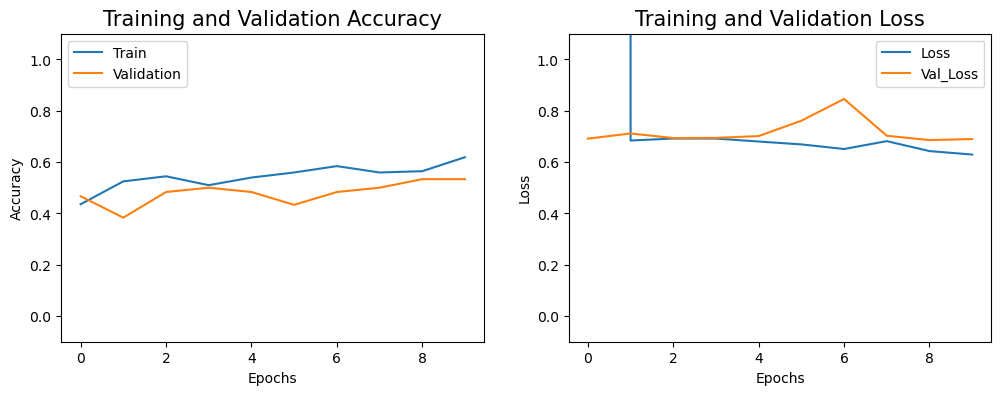

In [17]:
plt.figure(figsize=(12,4))
plot_accuracy(history2)
plot_loss(history2)

## *Model-3*  --> Adding Dropouts, BatchNormalization Layer

In [18]:
model3=Sequential()
model3.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200,200,3)))
model3.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same' ))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2,2)))
model3.add(Dropout(0.3))

model3.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same' ))
model3.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same' ))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2,2)))
model3.add(Dropout(0.3))

model3.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same' ))
model3.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same' ))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2,2)))
model3.add(Dropout(0.3))

model3.add(Flatten())
model3.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model3.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model3.add(Dense(2, activation='sigmoid'))

In [19]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 200, 200, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 200, 200, 32)      9248      
                                                                 
 batch_normalization (Batch  (None, 200, 200, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 100, 100, 32)      0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 100, 100, 32)      0         
                                                                 
 conv2d_14 (Conv2D)          (None, 100, 100, 64)     

In [20]:
start = time.time()
history3=model3.fit(train_nopre, epochs=10, validation_data=validtn_nopre)
end = time.time()
print('\nTime taken for model training:',end-start,'Seconds')

Epoch 1/10
26/26 [==============================] - 13s 428ms/step - loss: 7.0911 - accuracy: 0.5347 - val_loss: 47.9175 - val_accuracy: 0.5167
Epoch 2/10
26/26 [==============================] - 11s 423ms/step - loss: 1.8384 - accuracy: 0.7475 - val_loss: 4.5737 - val_accuracy: 0.4667
Epoch 3/10
26/26 [==============================] - 11s 423ms/step - loss: 1.6060 - accuracy: 0.7574 - val_loss: 4.0156 - val_accuracy: 0.6000
Epoch 4/10
26/26 [==============================] - 12s 455ms/step - loss: 1.1880 - accuracy: 0.8168 - val_loss: 7.6449 - val_accuracy: 0.4667
Epoch 5/10
26/26 [==============================] - 11s 433ms/step - loss: 1.0421 - accuracy: 0.8515 - val_loss: 6.6579 - val_accuracy: 0.4500
Epoch 6/10
26/26 [==============================] - 11s 422ms/step - loss: 0.9246 - accuracy: 0.8663 - val_loss: 5.0116 - val_accuracy: 0.5333
Epoch 7/10
26/26 [==============================] - 11s 432ms/step - loss: 0.3985 - accuracy: 0.9059 - val_loss: 3.6276 - val_accuracy: 0.500

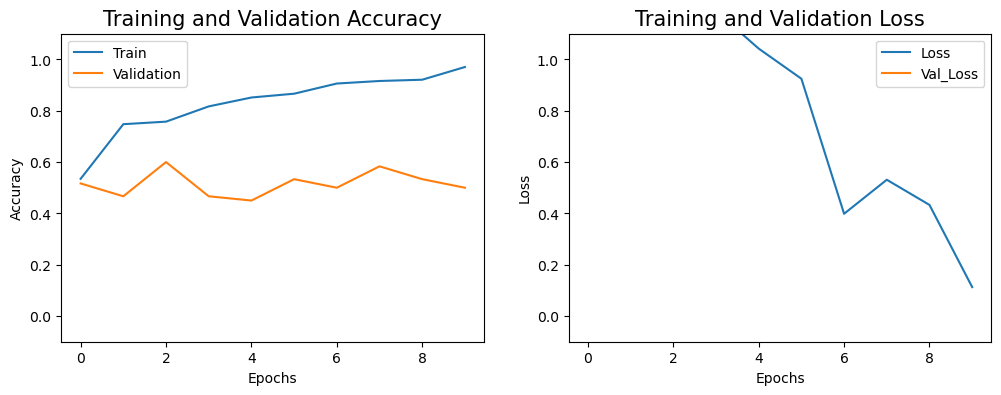

In [21]:
plt.figure(figsize=(12,4))
plot_accuracy(history3)
plot_loss(history3)

# **SCALED**

## *Model-1*

In [22]:
start = time.time()
history1_scal=model1.fit(train_scal, epochs=10, validation_data=validtn_scal)
end = time.time()
print('\nTime taken for model training:',end-start,'Seconds')

Epoch 1/10
26/26 [==============================] - 10s 369ms/step - loss: 0.6628 - accuracy: 0.7129 - val_loss: 0.6986 - val_accuracy: 0.5167
Epoch 2/10
26/26 [==============================] - 10s 381ms/step - loss: 0.6365 - accuracy: 0.7030 - val_loss: 0.7315 - val_accuracy: 0.5333
Epoch 3/10
26/26 [==============================] - 9s 356ms/step - loss: 0.5768 - accuracy: 0.8168 - val_loss: 0.8823 - val_accuracy: 0.5167
Epoch 4/10
26/26 [==============================] - 9s 348ms/step - loss: 0.5206 - accuracy: 0.8218 - val_loss: 0.7597 - val_accuracy: 0.6000
Epoch 5/10
26/26 [==============================] - 9s 344ms/step - loss: 0.4214 - accuracy: 0.8218 - val_loss: 1.1292 - val_accuracy: 0.5333
Epoch 6/10
26/26 [==============================] - 9s 347ms/step - loss: 0.4046 - accuracy: 0.8812 - val_loss: 0.9967 - val_accuracy: 0.5167
Epoch 7/10
26/26 [==============================] - 10s 372ms/step - loss: 0.2580 - accuracy: 0.9010 - val_loss: 1.5370 - val_accuracy: 0.6667
Epo

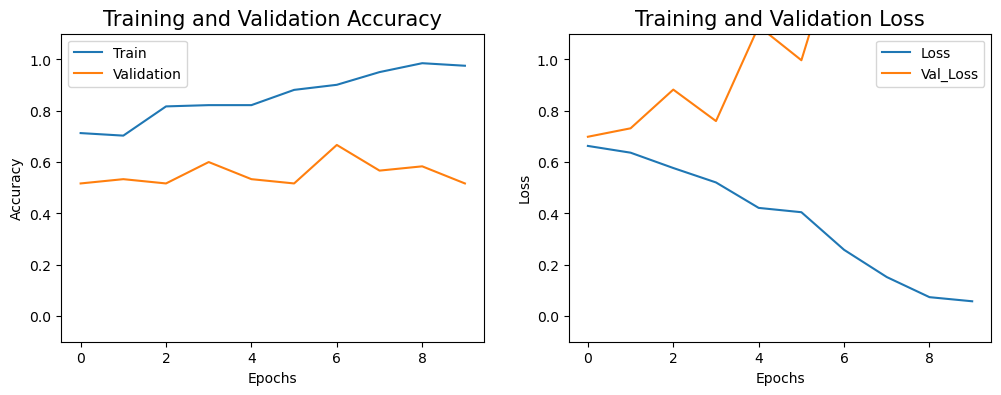

In [23]:
plt.figure(figsize=(12,4))
plot_accuracy(history1_scal)
plot_loss(history1_scal)

## *Model-2* --> Adding Dropout Layers

In [24]:
start = time.time()
history2_scal=model2.fit(train_scal, epochs=10, validation_data=validtn_scal)
end = time.time()
print('\nTime taken for model training:',end-start,'Seconds')

Epoch 1/10
26/26 [==============================] - 10s 371ms/step - loss: 0.6938 - accuracy: 0.5000 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 2/10
26/26 [==============================] - 10s 369ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6992 - val_accuracy: 0.5000
Epoch 3/10
26/26 [==============================] - 10s 371ms/step - loss: 0.6846 - accuracy: 0.5050 - val_loss: 0.7033 - val_accuracy: 0.5000
Epoch 4/10
26/26 [==============================] - 10s 396ms/step - loss: 0.6718 - accuracy: 0.5248 - val_loss: 0.7216 - val_accuracy: 0.4333
Epoch 5/10
26/26 [==============================] - 10s 379ms/step - loss: 0.6279 - accuracy: 0.6634 - val_loss: 0.8187 - val_accuracy: 0.4500
Epoch 6/10
26/26 [==============================] - 10s 375ms/step - loss: 0.6090 - accuracy: 0.6832 - val_loss: 0.8820 - val_accuracy: 0.4833
Epoch 7/10
26/26 [==============================] - 10s 374ms/step - loss: 0.5496 - accuracy: 0.7624 - val_loss: 0.8867 - val_accuracy: 0.5000

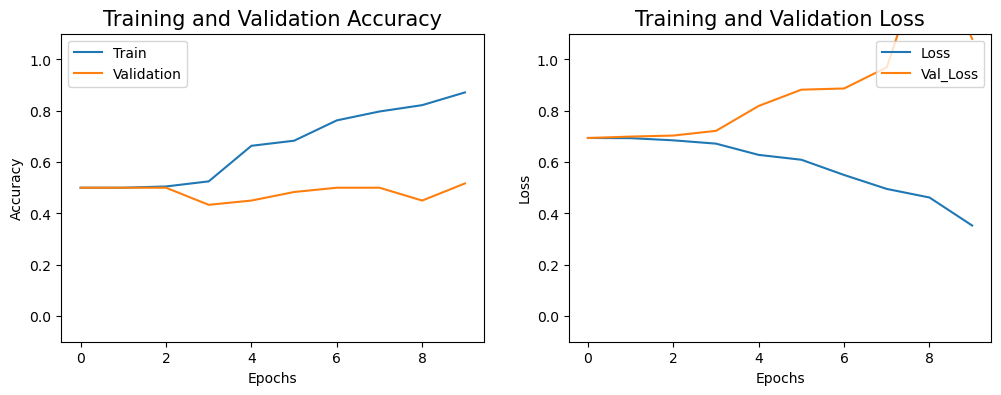

In [25]:
plt.figure(figsize=(12,4))
plot_accuracy(history2_scal)
plot_loss(history2_scal)

## *Model-3*  --> Adding Dropouts, BatchNormalization Layer

In [26]:
start = time.time()
history3_scal=model3.fit(train_scal, epochs=10, validation_data=validtn_scal)
end = time.time()
print('\nTime taken for model training:',end-start,'Seconds')

Epoch 1/10
26/26 [==============================] - 12s 444ms/step - loss: 0.6438 - accuracy: 0.9109 - val_loss: 3.1783 - val_accuracy: 0.5000
Epoch 2/10
26/26 [==============================] - 11s 423ms/step - loss: 0.5718 - accuracy: 0.9307 - val_loss: 3.7176 - val_accuracy: 0.5000
Epoch 3/10
26/26 [==============================] - 11s 422ms/step - loss: 0.4153 - accuracy: 0.9455 - val_loss: 1.8995 - val_accuracy: 0.5000
Epoch 4/10
26/26 [==============================] - 11s 419ms/step - loss: 0.5395 - accuracy: 0.9356 - val_loss: 10.7961 - val_accuracy: 0.4833
Epoch 5/10
26/26 [==============================] - 11s 426ms/step - loss: 0.2493 - accuracy: 0.9752 - val_loss: 13.6520 - val_accuracy: 0.5000
Epoch 6/10
26/26 [==============================] - 11s 435ms/step - loss: 0.4165 - accuracy: 0.9554 - val_loss: 10.4936 - val_accuracy: 0.5000
Epoch 7/10
26/26 [==============================] - 11s 428ms/step - loss: 0.0559 - accuracy: 0.9950 - val_loss: 25.7660 - val_accuracy: 0.

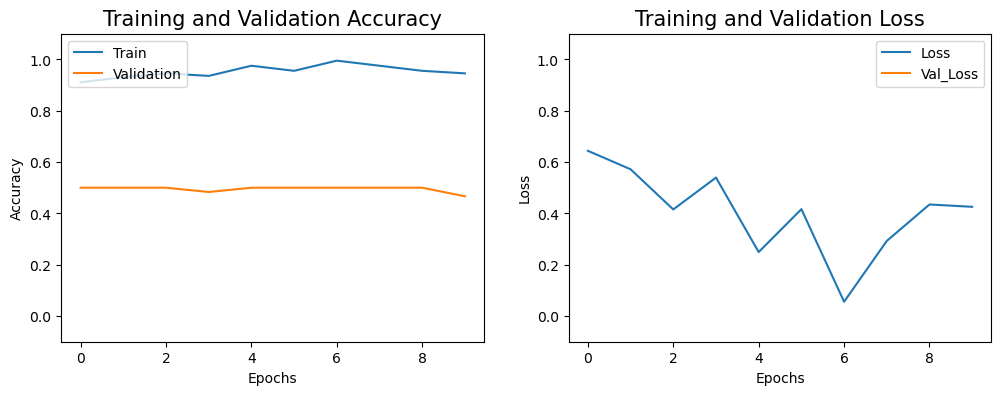

In [27]:
plt.figure(figsize=(12,4))
plot_accuracy(history3_scal)
plot_loss(history3_scal)

# **NORMALIZED**

## *Model-1*

In [28]:
start = time.time()
history1_norm=model1.fit(train_norm, epochs=10, validation_data=validtn_norm)
end = time.time()
print('\nTime taken for model training:',end-start,'Seconds')

Epoch 1/10
26/26 [==============================] - 9s 338ms/step - loss: 1.6992 - accuracy: 0.5446 - val_loss: 0.6730 - val_accuracy: 0.6000
Epoch 2/10
26/26 [==============================] - 10s 395ms/step - loss: 0.5868 - accuracy: 0.6980 - val_loss: 0.8370 - val_accuracy: 0.5667
Epoch 3/10
26/26 [==============================] - 12s 484ms/step - loss: 0.5358 - accuracy: 0.7574 - val_loss: 0.6958 - val_accuracy: 0.5833
Epoch 4/10
26/26 [==============================] - 9s 352ms/step - loss: 0.3155 - accuracy: 0.8762 - val_loss: 0.7588 - val_accuracy: 0.5500
Epoch 5/10
26/26 [==============================] - 9s 362ms/step - loss: 0.1654 - accuracy: 0.9455 - val_loss: 1.0699 - val_accuracy: 0.5167
Epoch 6/10
26/26 [==============================] - 9s 344ms/step - loss: 0.0413 - accuracy: 0.9901 - val_loss: 1.5263 - val_accuracy: 0.5500
Epoch 7/10
26/26 [==============================] - 9s 328ms/step - loss: 0.0300 - accuracy: 0.9901 - val_loss: 1.4737 - val_accuracy: 0.6000
Epoc

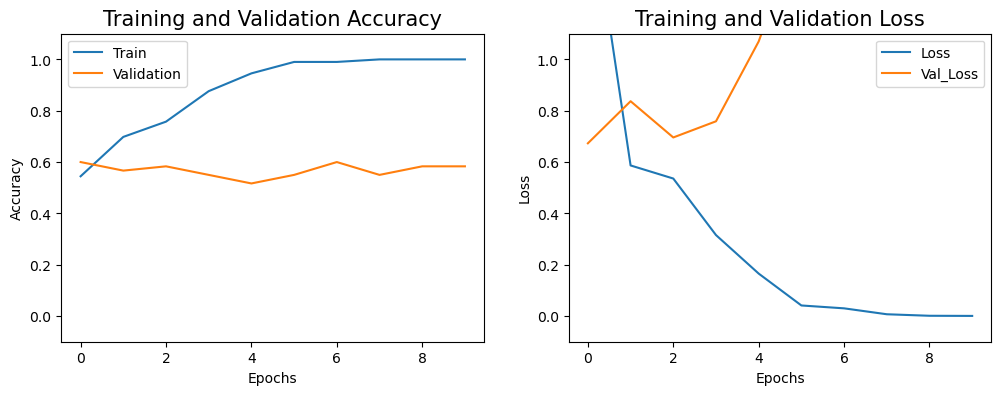

In [29]:
plt.figure(figsize=(12,4))
plot_accuracy(history1_norm)
plot_loss(history1_norm)

## *Model-2* --> Adding Dropout Layers

In [30]:
start = time.time()
history2_norm=model2.fit(train_norm, epochs=10, validation_data=validtn_norm)
end = time.time()
print('\nTime taken for model training:',end-start,'Seconds')

Epoch 1/10
26/26 [==============================] - 9s 355ms/step - loss: 0.8300 - accuracy: 0.5000 - val_loss: 0.7004 - val_accuracy: 0.5167
Epoch 2/10
26/26 [==============================] - 10s 384ms/step - loss: 0.7123 - accuracy: 0.5396 - val_loss: 0.7004 - val_accuracy: 0.5000
Epoch 3/10
26/26 [==============================] - 9s 339ms/step - loss: 0.6990 - accuracy: 0.5000 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 4/10
26/26 [==============================] - 9s 351ms/step - loss: 0.6914 - accuracy: 0.5099 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 5/10
26/26 [==============================] - 10s 393ms/step - loss: 0.6908 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 6/10
26/26 [==============================] - 10s 378ms/step - loss: 0.6877 - accuracy: 0.5149 - val_loss: 0.6928 - val_accuracy: 0.5167
Epoch 7/10
26/26 [==============================] - 10s 383ms/step - loss: 0.6773 - accuracy: 0.5495 - val_loss: 0.6865 - val_accuracy: 0.6333
Ep

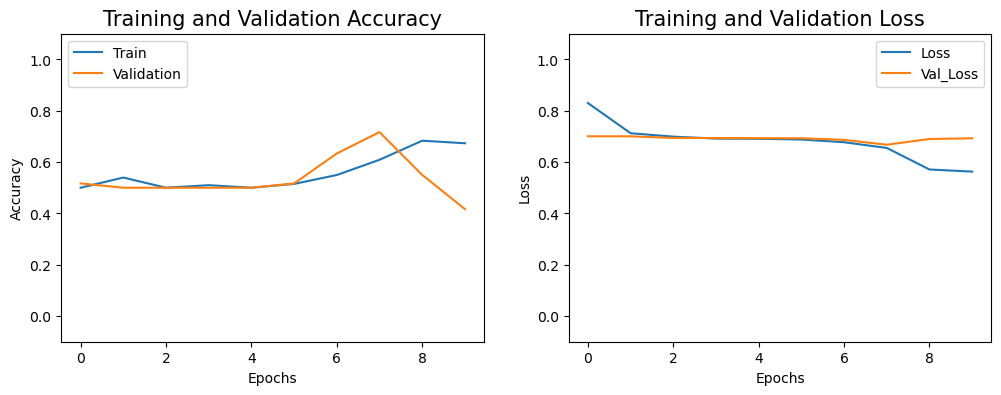

In [31]:
plt.figure(figsize=(12,4))
plot_accuracy(history2_norm)
plot_loss(history2_norm)

## *Model-3*  --> Adding Dropouts, BatchNormalization Layer

In [32]:
start = time.time()
history3_norm=model3.fit(train_norm, epochs=10, validation_data=validtn_norm)
end = time.time()
print('\nTime taken for model training:',end-start,'Seconds')

Epoch 1/10
26/26 [==============================] - 11s 439ms/step - loss: 1.0307 - accuracy: 0.8663 - val_loss: 9.9973 - val_accuracy: 0.6167
Epoch 2/10
26/26 [==============================] - 12s 456ms/step - loss: 0.4636 - accuracy: 0.9455 - val_loss: 12.4703 - val_accuracy: 0.5500
Epoch 3/10
26/26 [==============================] - 11s 442ms/step - loss: 0.1523 - accuracy: 0.9703 - val_loss: 7.8292 - val_accuracy: 0.7167
Epoch 4/10
26/26 [==============================] - 11s 400ms/step - loss: 0.1942 - accuracy: 0.9802 - val_loss: 6.5395 - val_accuracy: 0.6000
Epoch 5/10
26/26 [==============================] - 11s 413ms/step - loss: 0.1793 - accuracy: 0.9851 - val_loss: 8.4439 - val_accuracy: 0.6000
Epoch 6/10
26/26 [==============================] - 11s 410ms/step - loss: 0.1535 - accuracy: 0.9851 - val_loss: 8.0166 - val_accuracy: 0.5667
Epoch 7/10
26/26 [==============================] - 10s 395ms/step - loss: 0.1518 - accuracy: 0.9851 - val_loss: 7.7230 - val_accuracy: 0.583

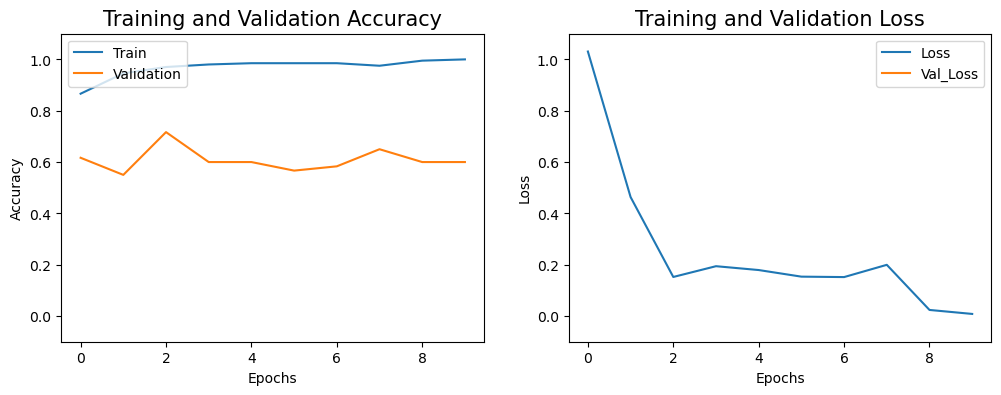

In [33]:
plt.figure(figsize=(12,4))
plot_accuracy(history3_norm)
plot_loss(history3_norm)

# **DATA AUGMENTATION**

In [34]:
datagen_augmen = ImageDataGenerator(
                                featurewise_center=True,
                                samplewise_center=True,
                                featurewise_std_normalization=False,
                                samplewise_std_normalization=True,
                                zca_whitening=False,
                                zca_epsilon=1e-06,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                brightness_range=None,
                                shear_range=0.3,
                                zoom_range=0.3,
                                channel_shift_range=0.0,
                                fill_mode='nearest',
                                cval=0.0,
                                horizontal_flip=True,
                                vertical_flip=True,
                                rescale=None,
                                preprocessing_function=None,
                                data_format=None,
                                validation_split=0.0,
                                interpolation_order=1,
                                dtype=None
)

In [35]:
train_augmen = datagen_augmen.flow_from_directory(train_data, target_size=(200,200), class_mode='binary', batch_size=8)  # Fetching data--- train_data is the path
validtn_augmen = datagen_augmen.flow_from_directory(validtn_data, target_size=(200,200), class_mode='binary', batch_size=8)
test_augmen = datagen_augmen.flow_from_directory(test_data, target_size=(200,200), class_mode='binary', batch_size=8)

Found 202 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 116 images belonging to 2 classes.


## *Model-1*

In [36]:
aug_model = Sequential()
aug_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))  ## Target_size and input_shape must be matched
aug_model.add(MaxPooling2D((2, 2)))

aug_model.add(Conv2D(64, (3, 3), activation='relu'))
aug_model.add(MaxPooling2D((2, 2)))

aug_model.add(Conv2D(128, (3, 3), activation='relu'))
aug_model.add(MaxPooling2D((2, 2)))

aug_model.add(Flatten())
aug_model.add(Dense(128, activation='relu'))
aug_model.add(Dropout(0.3))
aug_model.add(Dense(1, activation='sigmoid'))            ## class_mode='binary' was set at(train_augmen) datagen_augmen's method, hence only 1 neuron

In [37]:
aug_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# aug_model.summary()

In [38]:
start=time.time()
history4_augmen = aug_model.fit(train_augmen,
                                # steps_per_epoch=train_augmen.samples // train_augmen.batch_size,
                                epochs=10,
                                validation_data=validtn_augmen
)
end=time.time()
print('\nTime taken for model training:',end-start,'Seconds')

Epoch 1/10


C:\Users\JithinvyasJanga\anaconda3\Lib\site-packages\keras\src\preprocessing\image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


26/26 [==============================] - 9s 297ms/step - loss: 1.2138 - accuracy: 0.5297 - val_loss: 0.7697 - val_accuracy: 0.5000
Epoch 2/10
26/26 [==============================] - 6s 233ms/step - loss: 0.6297 - accuracy: 0.6337 - val_loss: 0.7440 - val_accuracy: 0.5500
Epoch 3/10
26/26 [==============================] - 6s 238ms/step - loss: 0.6637 - accuracy: 0.6733 - val_loss: 0.6850 - val_accuracy: 0.5333
Epoch 4/10
26/26 [==============================] - 7s 278ms/step - loss: 0.6168 - accuracy: 0.6980 - val_loss: 0.6665 - val_accuracy: 0.6167
Epoch 5/10
26/26 [==============================] - 6s 231ms/step - loss: 0.5905 - accuracy: 0.6733 - val_loss: 0.6631 - val_accuracy: 0.6167
Epoch 6/10
26/26 [==============================] - 6s 245ms/step - loss: 0.5831 - accuracy: 0.6980 - val_loss: 0.7866 - val_accuracy: 0.5000
Epoch 7/10
26/26 [==============================] - 7s 255ms/step - loss: 0.6511 - accuracy: 0.6634 - val_loss: 0.6848 - val_accuracy: 0.5333
Epoch 8/10
26/26 

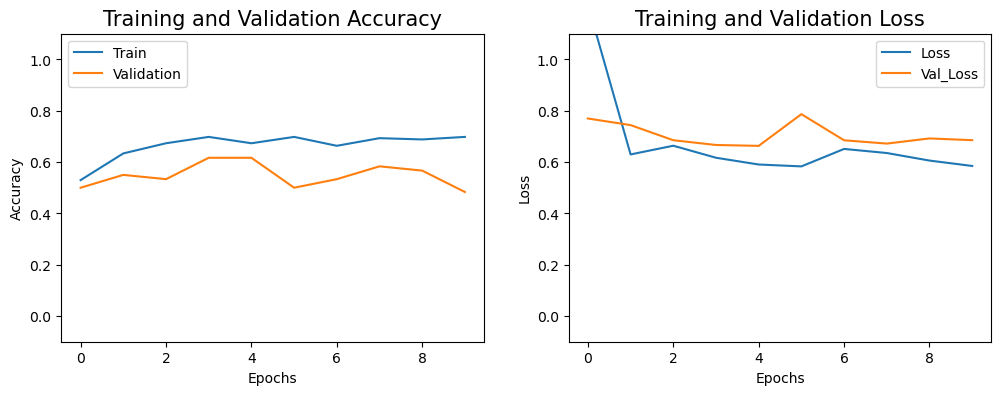

In [39]:
plt.figure(figsize=(12,4))
plot_accuracy(history4_augmen)
plot_loss(history4_augmen)

## *Model-2* --> Adding dropouts and batch normalization

In [40]:
aug_model2 = Sequential()
aug_model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
aug_model2.add(Conv2D(32, (3, 3), activation='relu'))
aug_model2.add(BatchNormalization())
aug_model2.add(MaxPooling2D((2, 2)))
aug_model2.add(Dropout(0.5))

aug_model2.add(Conv2D(64, (3, 3), activation='relu'))
aug_model2.add(BatchNormalization())
aug_model2.add(MaxPooling2D((2, 2)))
aug_model2.add(Dropout(0.5))

aug_model2.add(Conv2D(128, (3, 3), activation='relu'))
aug_model2.add(BatchNormalization())
aug_model2.add(MaxPooling2D((2, 2)))
aug_model2.add(Dropout(0.5))

aug_model2.add(Flatten())
aug_model2.add(Dense(128, activation='relu'))
aug_model2.add(Dropout(0.5))
aug_model2.add(Dense(1, activation='sigmoid'))

In [41]:
aug_model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
aug_model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 conv2d_22 (Conv2D)          (None, 196, 196, 32)      9248      
                                                                 
 batch_normalization_3 (Bat  (None, 196, 196, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 98, 98, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_7 (Dropout)         (None, 98, 98, 32)        0         
                                                                 
 conv2d_23 (Conv2D)          (None, 96, 96, 64)       

In [42]:
start=time.time()
history5_augmen = aug_model2.fit(train_augmen,
                                epochs=10,
                                validation_data=validtn_augmen
)
end=time.time()
print('\nTime taken for model training:',end-start,'Seconds')

Epoch 1/10
26/26 [==============================] - 13s 445ms/step - loss: 11.1085 - accuracy: 0.6089 - val_loss: 4.6533 - val_accuracy: 0.5667
Epoch 2/10
26/26 [==============================] - 10s 398ms/step - loss: 7.0964 - accuracy: 0.6386 - val_loss: 20.5866 - val_accuracy: 0.5167
Epoch 3/10
26/26 [==============================] - 9s 324ms/step - loss: 3.7864 - accuracy: 0.5891 - val_loss: 14.3569 - val_accuracy: 0.5000
Epoch 4/10
26/26 [==============================] - 9s 327ms/step - loss: 1.2544 - accuracy: 0.6139 - val_loss: 11.5402 - val_accuracy: 0.5333
Epoch 5/10
26/26 [==============================] - 9s 342ms/step - loss: 0.9786 - accuracy: 0.6238 - val_loss: 15.7063 - val_accuracy: 0.4833
Epoch 6/10
26/26 [==============================] - 9s 342ms/step - loss: 1.3808 - accuracy: 0.6337 - val_loss: 17.7540 - val_accuracy: 0.4833
Epoch 7/10
26/26 [==============================] - 8s 309ms/step - loss: 0.7073 - accuracy: 0.5842 - val_loss: 15.4984 - val_accuracy: 0.50

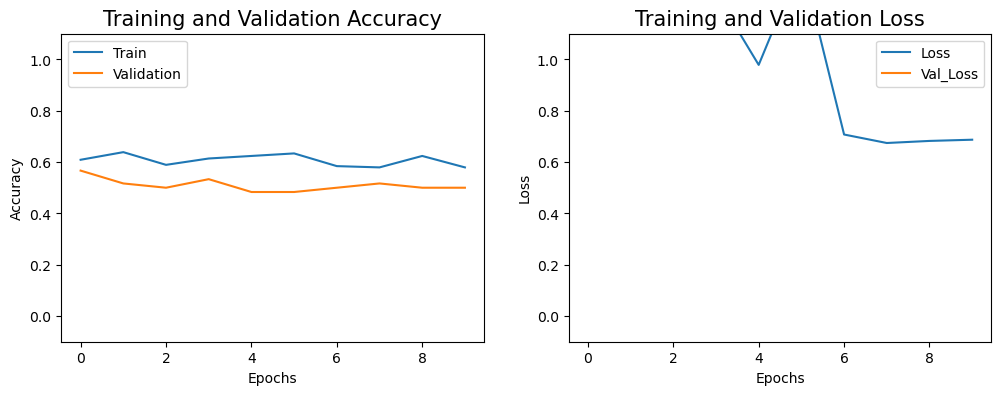

In [43]:
plt.figure(figsize=(12,4))
plot_accuracy(history5_augmen)
plot_loss(history5_augmen)

# **TRANSFER LEARNING**

In [44]:
from keras.applications.vgg16 import VGG16
from keras.callbacks import EarlyStopping

## *Data Augmentation*

In [45]:
from keras.applications.vgg16 import VGG16

base_model = VGG16(
                  include_top=False,
                  weights="imagenet",
                  input_tensor=None,
                  input_shape=(200,200,3),
)

In [46]:
from keras.callbacks import EarlyStopping

early_stop=EarlyStopping(
            monitor="accuracy",
            min_delta=2,
            patience=5,
            verbose=1,
            mode="auto",
            baseline=None,
            restore_best_weights=False,
)

In [47]:
# Freeze the convolutional base
for layer in base_model.layers:
    layer.trainable = False

In [48]:
tfLearn_model = Sequential()
tfLearn_model.add(base_model)
tfLearn_model.add(Flatten())

tfLearn_model.add(Dense(64, activation='relu'))
tfLearn_model.add(Dropout(0.4))
tfLearn_model.add(Dense(1, activation='sigmoid'))  ## At datagen_augmen's method [ ImageDataGenerator().flow_from_directory(class_type = 'binary') ], hence 1 neuron

In [49]:
tfLearn_model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])
tfLearn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 18432)             0         
                                                                 
 dense_13 (Dense)            (None, 64)                1179712   
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 15894465 (60.63 MB)
Trainable params: 1179777 (4.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [50]:
tfmodel_history1 = tfLearn_model.fit(train_augmen, validation_data=validtn_augmen, epochs=10, callbacks=early_stop)   ## Data Augmentation's model

Epoch 1/10
26/26 [==============================] - 16s 589ms/step - loss: 0.8841 - accuracy: 0.6089 - val_loss: 0.6508 - val_accuracy: 0.7167
Epoch 2/10
26/26 [==============================] - 15s 587ms/step - loss: 0.4657 - accuracy: 0.7970 - val_loss: 0.5345 - val_accuracy: 0.7667
Epoch 3/10
26/26 [==============================] - 15s 567ms/step - loss: 0.3402 - accuracy: 0.8465 - val_loss: 0.5404 - val_accuracy: 0.7333
Epoch 4/10
26/26 [==============================] - 15s 586ms/step - loss: 0.3705 - accuracy: 0.8564 - val_loss: 0.5570 - val_accuracy: 0.7500
Epoch 5/10
26/26 [==============================] - 15s 590ms/step - loss: 0.2929 - accuracy: 0.8812 - val_loss: 0.5885 - val_accuracy: 0.7000
Epoch 6/10
26/26 [==============================] - 14s 557ms/step - loss: 0.2740 - accuracy: 0.8911 - val_loss: 0.5292 - val_accuracy: 0.7667
Epoch 6: early stopping


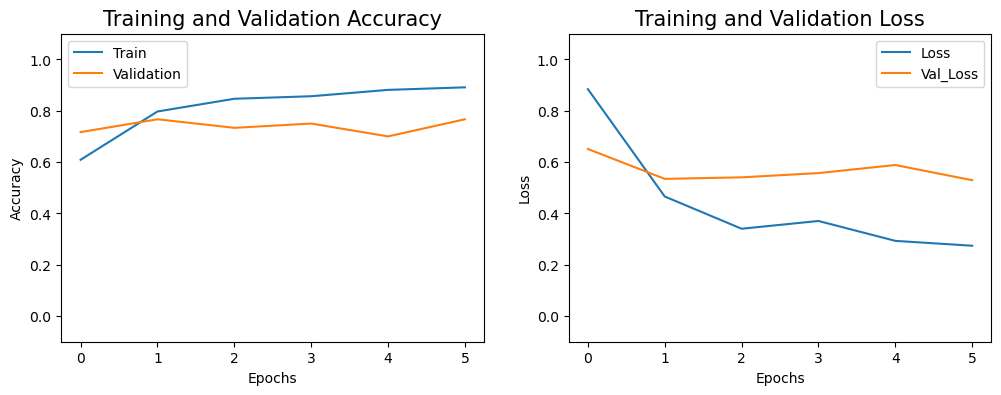

In [51]:
plt.figure(figsize=(12,4))
plot_accuracy(tfmodel_history1)
plot_loss(tfmodel_history1)

## *Normalized data*

In [52]:
# start = time.time()
# tfmodel_history2 = tfLearn_model.fit(train_norm, epochs=10, validation_data=validtn_norm, callbacks=early_stop)
# end = time.time()
# print('\nTime taken for model training:',end-start,'Seconds')

In [53]:
# plt.figure(figsize=(12,4))
# plot_accuracy(tfmodel_history2)
# plot_loss(tfmodel_history2)

# Saving Model

In [58]:
tfLearn_model.save('augmented_tfLearn_model') 

INFO:tensorflow:Assets written to: augmented_tfLearn_model\assets


INFO:tensorflow:Assets written to: augmented_tfLearn_model\assets


# Loading Model

In [59]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model = load_model('augmented_tfLearn_model')

In [62]:
def pred_class(img_link):
    img_path = img_link
    img = image.load_img(img_path, target_size=(200, 200,3))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Make predictions
    predictions = model.predict(img_array)
    print(predictions)

    # Display the prediction
    if predictions[0][0] > 0.5:
        print("DOGS Class")     #class-1
    else:
        print("CATS Class")     #class-0  --ordered by folder wise


    return predictions

In [63]:
pred_class('test_data/dog/dog_0045.jpg')

1/1 [==============================] - 0s 82ms/step
[[0.6176941]]
DOGS Class


array([[0.6176941]], dtype=float32)

In [75]:
pred_class('test_data/dog/dog_0062.jpg') # wrongly predicted img

1/1 [==============================] - 0s 80ms/step
[[0.27032077]]
CATS Class


array([[0.27032077]], dtype=float32)

In [68]:
pred_class('test_data/cat/cat_0099.jpg')

1/1 [==============================] - 0s 81ms/step
[[0.04406502]]
CATS Class


array([[0.04406502]], dtype=float32)

In [79]:
pred_class('test_data/cat/cat_0088.jpg')

1/1 [==============================] - 0s 81ms/step
[[0.01770416]]
CATS Class


array([[0.01770416]], dtype=float32)

### Observation & Conclusions

--> Mostly CATS class is getting predicted

--> Models getting Overfitted, no learning is happening

--> Exponentially increasing validation loss

--> More data can be added to decrease loss

--> changing learning rate (Adam recommended-- popular optimizer in Deep Learning projects)

--> GPU's can be used for faster trainings for model evaluation on trail & error basis
